In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, \
accuracy_score, confusion_matrix ,f1_score, precision_score, recall_score, auc
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
def read_csv(path_to_file,train,test):
    train_df = pd.read_csv(path_to_file+"/"+train)
    test_df = pd.read_csv(path_to_file+"/"+test)
    print("Train Shape:",train_df.shape,"Test Shape:",test_df.shape)



    return train_df,test_df

In [6]:
path_to_file="data/logs_params"
train="BGL_train_params.csv"
test="BGL_test_params.csv"

BGL_train,BGL_test=read_csv(path_to_file,train,test)

Train Shape: (79999, 11) Test Shape: (20001, 13)


In [7]:
path_to_file="output"
train="Thunderbird_train_params.csv"
test="Thunderbird_test_params.csv"
col='label'
data='Thunderbird'

thunder_train,thunder_test=read_csv(path_to_file,train,test)

Train Shape: (79999, 20) Test Shape: (20001, 11)


In [8]:
thunder_train.columns

Index(['Unnamed: 0', 'timestamp', 'text', 'label', 'filename', 'clusters',
       'p-0-0', 'p-0-1', 'p-0-2', 'p-0-3', 'p-0-4', 'p-0-5', 'p-0-6', 'p-4-0',
       'p-8-0', 'p-9-0', 'p-11-0', 'p-18-0', 'p-37-0', 'p-37-1'],
      dtype='object')

In [9]:
thunder_test.columns

Index(['Unnamed: 0', 'timestamp', 'text', 'label', 'filename', 'clusters',
       'p-0-0', 'p-0-1', 'p-0-2', 'p-8-0', 'p-18-0'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def encoding(train,test,cluster=None,label=None):

    le = LabelEncoder()
    ohe = OneHotEncoder()

    train_dummies = pd.get_dummies(train['clusters'])
    train['label'] = le.fit_transform(train['label'])

    test_dummies = pd.get_dummies(test['clusters'])
    test['label'] = le.fit_transform(test['label'])

    for col in train_dummies.columns:
        if not col in test_dummies.columns:
            continue
        col_name = 'c' + str(col)
        train[col_name] = train_dummies[col]
        test[col_name] = test_dummies[col]

    train.drop(columns=['clusters'], inplace=True)
    test.drop(columns=['clusters'], inplace=True)
    train.head()
    return train,test

In [11]:
encoded_train_BGL,encoded_test_BGL= encoding(BGL_train,BGL_test,cluster='clusters',label='label')
encoded_train_t,encoded_test_t= encoding(thunder_train,thunder_test,cluster='clusters',label='label')

In [12]:
def train_test(train, test):
    for col in train.columns:
        if col not in test.columns:
            test[col] = 0
    
    for col in test.columns:
        if col not in train.columns:
            train[col] = 0

    X_train= train.drop(columns = ['Unnamed: 0', 'label','text','filename','timestamp'])
    X_train.fillna(0,inplace=True)
    y_train=train.loc[:,'label']
    
    X_test= test.drop(columns = ['Unnamed: 0', 'label','text','filename','timestamp'])
    X_test.fillna(0,inplace=True)
    y_test=test.loc[:,'label']
    
    return X_train,y_train.values,X_test,y_test.values

In [13]:
x_train_BGL,y_train_BGL,x_test_BGL,y_test_BGL = train_test(encoded_train_BGL,encoded_test_BGL)
x_train_t,y_train_t,x_test_t,y_test_t=train_test(encoded_train_t,encoded_test_t)

In [14]:
print("columns for the x_test file"+ str(x_test_t.columns))
print("columns for the x_train file"+ str(x_train_t.columns))

columns for the x_test fileIndex(['p-0-0', 'p-0-1', 'p-0-2', 'p-8-0', 'p-18-0', 'c0', 'c1', 'c2', 'c3',
       'c5', 'c6', 'c8', 'c9', 'c10', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18',
       'c20', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c29', 'c32', 'c33',
       'c34', 'c35', 'c36', 'c38', 'c39', 'p-0-3', 'p-0-4', 'p-0-5', 'p-0-6',
       'p-4-0', 'p-9-0', 'p-11-0', 'p-37-0', 'p-37-1'],
      dtype='object')
columns for the x_train fileIndex(['p-0-0', 'p-0-1', 'p-0-2', 'p-0-3', 'p-0-4', 'p-0-5', 'p-0-6', 'p-4-0',
       'p-8-0', 'p-9-0', 'p-11-0', 'p-18-0', 'p-37-0', 'p-37-1', 'c0', 'c1',
       'c2', 'c3', 'c5', 'c6', 'c8', 'c9', 'c10', 'c13', 'c14', 'c15', 'c16',
       'c17', 'c18', 'c20', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c29',
       'c32', 'c33', 'c34', 'c35', 'c36', 'c38', 'c39'],
      dtype='object')


In [15]:
x_train_BGL = x_train_BGL[x_test_BGL.columns]
x_train_t=x_train_t[x_test_t.columns]

In [16]:
x_train_t.columns==x_test_t.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [17]:
print(x_train_BGL.shape,y_train_BGL.shape,x_test_BGL.shape,y_test_BGL.shape)
print(x_train_t.shape,y_train_t.shape,x_test_t.shape,y_test_t.shape)

(79999, 28) (79999,) (20001, 28) (20001,)
(79999, 44) (79999,) (20001, 44) (20001,)


# Gradient boosted decision tree

### Thunderbird

In [18]:
#import models
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0).fit(x_train_t, y_train_t)
y_pred = clf.predict(x_test_t)

y_pred1 = clf.predict(x_train_t)


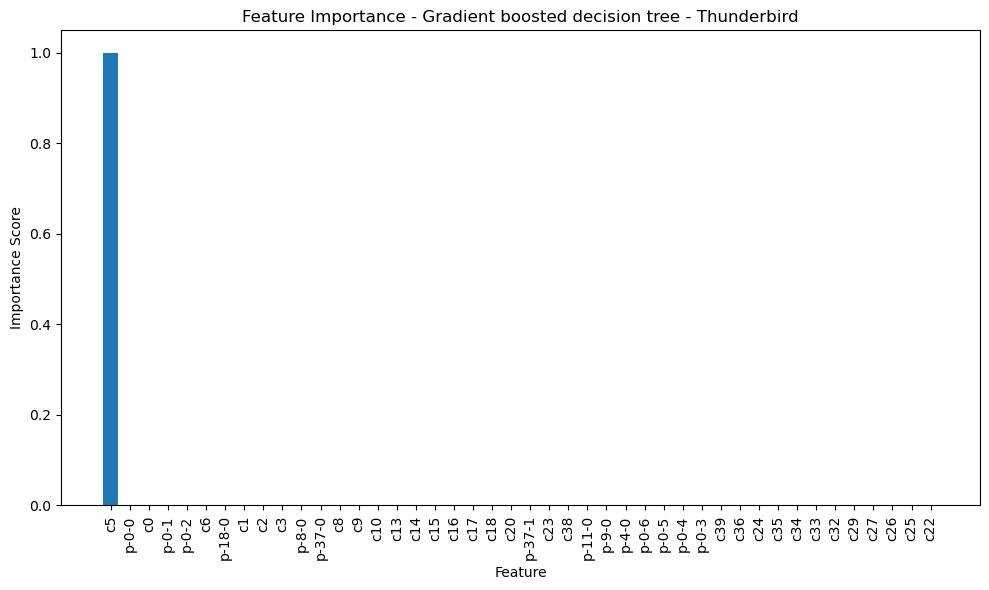

In [19]:
# Get the feature importance scores
importance_scores = clf.feature_importances_
feature_names = x_train_t.columns

# Sort the features based on their importance scores
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importance using bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_names)), sorted_scores, align='center')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Gradient boosted decision tree - Thunderbird')
plt.tight_layout()
plt.show()


Test Result:
Accuracy Score: 100.00%
_______________________________________________
Accuracy Score for train: 99.99%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999947     1.000000   0.99995      0.999974       0.99995
recall         1.000000     0.999107   0.99995      0.999554       0.99995
f1-score       0.999974     0.999553   0.99995      0.999763       0.99995
support    18881.000000  1120.000000   0.99995  20001.000000   20001.00000
_______________________________________________
Confusion Matrix: 
 [[18881     0]
 [    1  1119]]

_______________________________________________
Recall Score: 
 0.9991071428571429
_______________________________________________
Recall Score For Train: 
 0.9995533720410897
_______________________________________________
Roc AUC Score: 
 0.9995535714285715


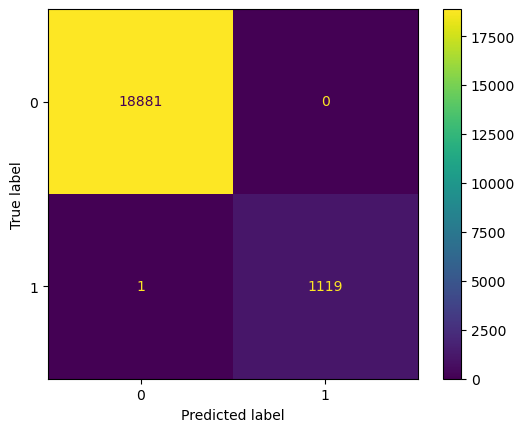

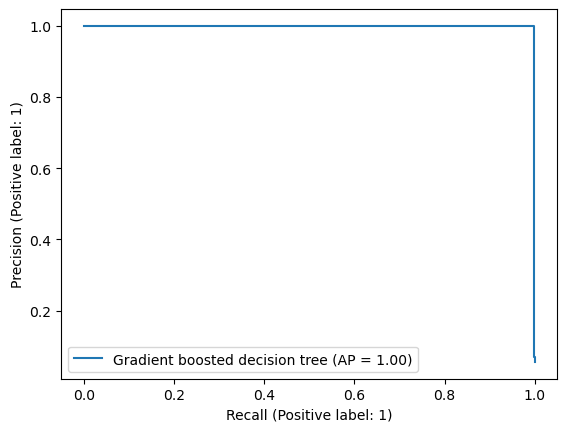

In [20]:
GBDT_report = pd.DataFrame(classification_report(y_test_t, y_pred, output_dict=True))
print("Test Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y_test_t, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Accuracy Score for train: {accuracy_score(y_train_t, y_pred1) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{GBDT_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test_t, y_pred)}\n")
print("_______________________________________________")
print(f'Recall Score: \n {recall_score(y_test_t, y_pred)}')
print("_______________________________________________")
print(f'Recall Score For Train: \n {recall_score(y_train_t, y_pred1)}')
print("_______________________________________________")
print(f'Roc AUC Score: \n {roc_auc_score(y_test_t, y_pred)}')

GBDT_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test_t, y_pred)
plt.show()

#pred_probs = lr.predict_prob(x_test)
#precision, recall, thresholds = precision_recall_curve(y_test, pred_probs)

from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, x_test_t, y_test_t, name="Gradient boosted decision tree"
)

### BGL

In [21]:
# fit model
clf.fit(x_train_BGL, y_train_BGL)
# make predictions
y_pred = clf.predict(x_test_BGL)
y_pred1 = clf.predict(x_train_BGL)

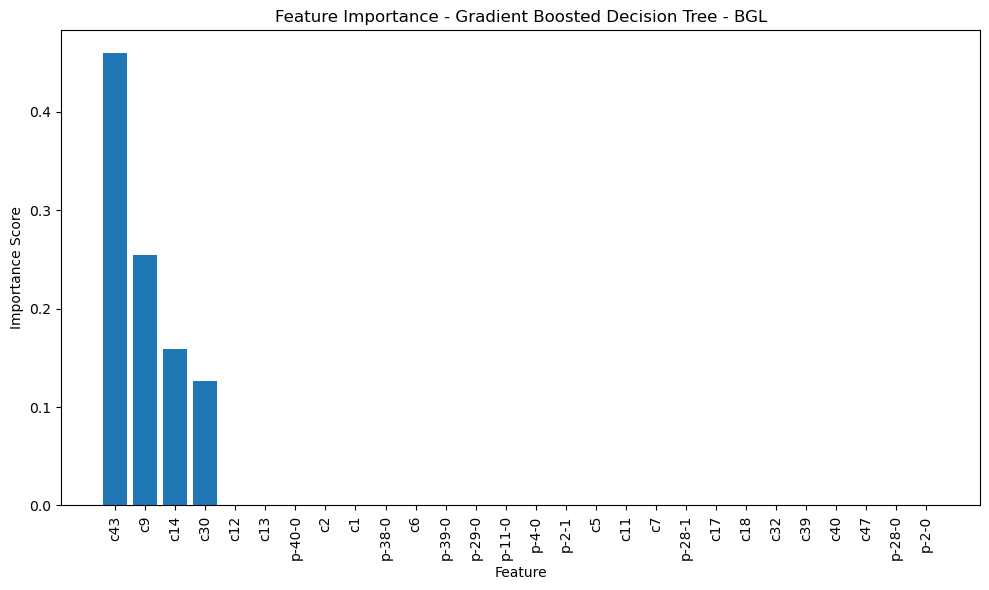

In [22]:
# Get the feature importance scores
importance_scores = clf.feature_importances_
feature_names = x_train_BGL.columns

# Sort the features based on their importance scores
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature importance using bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_names)), sorted_scores, align='center')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Gradient Boosted Decision Tree - BGL')
plt.tight_layout()
plt.show()


Test Result:
Accuracy Score: 99.93%
_______________________________________________
Accuracy Score for train: 99.97%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999621     0.995478    0.9993      0.997549        0.9993
recall         0.999621     0.995478    0.9993      0.997549        0.9993
f1-score       0.999621     0.995478    0.9993      0.997549        0.9993
support    18453.000000  1548.000000    0.9993  20001.000000    20001.0000
_______________________________________________
CLASSIFICATION REPORT FOR TRAIN:
                      0            1  accuracy     macro avg  weighted avg
precision      0.999851     0.998546   0.99975      0.999198       0.99975
recall         0.999878     0.998223   0.99975      0.999051       0.99975
f1-score       0.999865     0.998384   0.99975      0.999124       0.99975
support    73809.000000  6190.000000   0.99975  79999.00

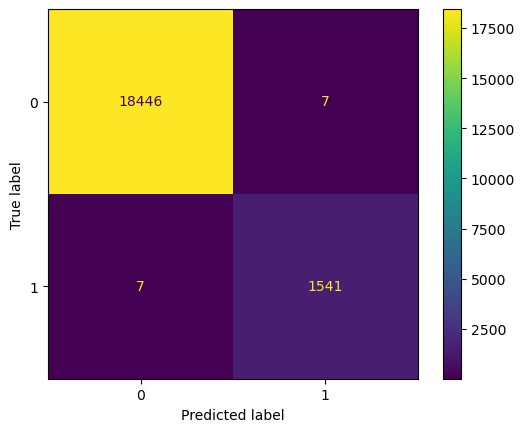

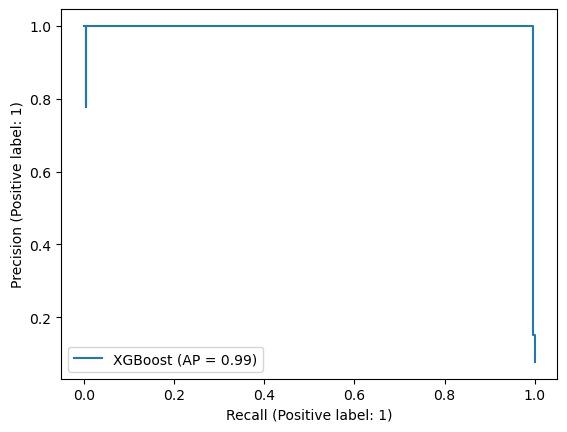

In [23]:
gbdt_report = pd.DataFrame(classification_report(y_test_BGL, y_pred, output_dict=True))
gbdt_report_train = pd.DataFrame(classification_report(y_train_BGL, y_pred1, output_dict=True))

print("Test Result:\n================================================")        
print(f"Accuracy Score: {accuracy_score(y_test_BGL, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"Accuracy Score for train: {accuracy_score(y_train_BGL, y_pred1) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_report}")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT FOR TRAIN:\n{gbdt_report_train}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test_BGL, y_pred)}\n")
print("_______________________________________________")
print(f'Recall Score: \n {recall_score(y_test_BGL, y_pred)}')
print("_______________________________________________")
print(f'Roc AUC Score: \n {roc_auc_score(y_test_BGL, y_pred)}')

gbdt_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test_BGL, y_pred)
plt.show()


from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, x_test_BGL, y_test_BGL, name="XGBoost"
)